In [9]:

import numpy as np
import json
def get_yield_alice_all(outdirectory = "processed"):
    directory = "/home/lieuwe/Documents/Software/articles/1612.08966/hepdata"

    tables = ["DN-DETARAP"]


   
    # ranges = [(269, 327),(249, 302),(241,292)]

    particle = ["ch"]

   
    total = {}
    names = {"ch" : "charged_1612.08966"}
    filenames = {"ch" : f"{outdirectory}/dNdeta_charged.json"}

    for i,p in enumerate(particle):
        table = tables[i]
        file = open(f"{directory}/{table}.csv", "r")
        lines = file.readlines()
        file.close()
        cin = -1

        data = [ [] for i in range(10)]
        # frange = ranges[i]
        for line in lines:
            # print(line)
            # print(line.find("CENTRALITY"))
            if line.find("CENTRALITY") >0:
                cin += 1
                # print(cin)
            if line.find("#") < 0 and line.find("$") < 0 and len(line) > 1:
                sline = line.strip().split(',')
                
                data[cin].append(sline)
                # print(sline)
        
        data = np.array(data).astype(float)
        
        # print(data)
        mp     = data[:,:,3]
        mp_err = (data[:,:,4] + data[:,:,6])
        pt = data[:,:,0]
        pt_err = np.abs((data[:,:,2] - data[:,:,1]))/2




        
        nbinsx = 9
        nbinsy = len(data[:,:,3][0])
        nbinsz = 1

        edgesx = np.array([0, 5, 10, 20, 30, 40, 50, 60, 80, 90])
        
        print(data[:,:,1][0])
        print(data[:,:,2][0][-1])
        edgesy = np.concatenate([data[:,:,1][0], [data[:,:,2][0][-1]]])
        

        midsx = (edgesx[1:] + edgesx[:-1])/2
        midsy = (edgesy[1:] + edgesy[:-1])/2
        

        widsx = (edgesx[1:] - edgesx[:-1])
        widsy = (edgesy[1:] - edgesy[:-1])
        

        errsx = widsx/2
        errsy = widsy/2
        

    
       
    
        hist = {}

        hist["settings"] = {}
        hist["settings"]["nbins"] = {"x" : int(nbinsx), "y" : int(nbinsy)}
        hist["settings"]["edges"] = {"x" : edgesx.tolist(), "y" : edgesy.tolist() }
        hist["settings"]["mids"] =  {"x" : midsx.tolist(), "y" :  midsy.tolist() }
        hist["settings"]["wids"] =  {"x" : widsx.tolist(), "y" :  widsy.tolist() }
        hist["settings"]["errs"] =  {"x" : errsx.tolist(), "y" :  errsy.tolist() }
        hist["settings"]["names"] = {"x" : "centrality", "y" : "pseudorapidity"}
        hist["contents"] = {"vals" : mp.tolist(), "errs" : mp_err.tolist()}
        hist["contents"]["name"] = "dN / d\eta"
        hist["name"] = names[p]

        total[p] = hist

    

        with open(filenames[p], "w") as file:
            json.dump(hist, file, indent = 4, separators=(',',':'))




   
    return total

In [10]:
hist = get_yield_alice_all()

[-3.5  -3.25 -3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
  2.5   2.75  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75]
5.0


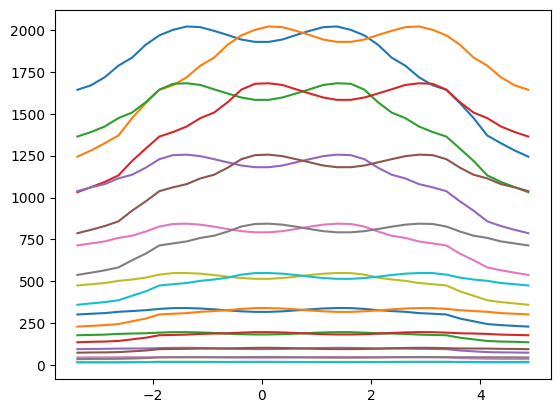

In [18]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.plot(hist["ch"]["settings"]["mids"]["y"],hist["ch"]["contents"]["vals"][i])
    plt.plot(np.flip(hist["ch"]["settings"]["mids"]["y"]),hist["ch"]["contents"]["vals"][i])